In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)

In [3]:
#Memanggil data iris
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Menampilkan ukuran data
df.shape

(150, 5)

In [5]:
#Memilih fitur
dropped_column = ['species']

features = df.drop(dropped_column, axis=1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#Mengambil variabel Kelas
dropped_column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

true_class = df.drop(dropped_column, axis=1)
true_class.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


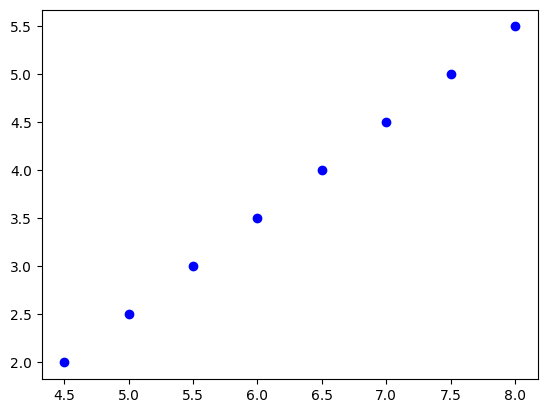

In [7]:
x1 = [4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
y1 = [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]

plt.scatter(x1, y1, c ="blue")
plt.show()

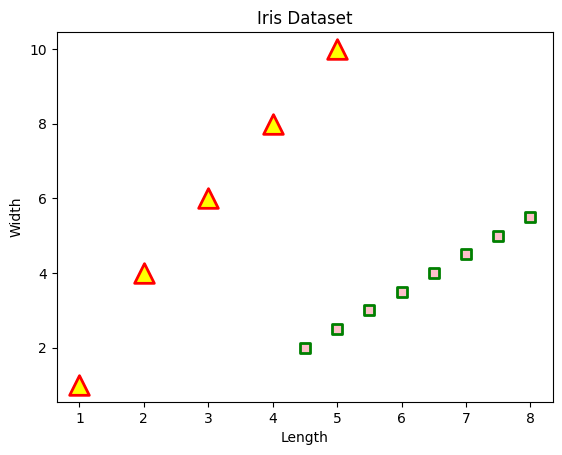

In [8]:
x2 = [1, 2, 3, 4, 5]
y2 = [1, 4, 6, 8, 10]

plt.scatter(x1, y1, c="pink", linewidths=2, marker="s", edgecolor="green", s=50)

plt.scatter(x2, y2, c="yellow", linewidths=2, marker="^", edgecolor="red", s=200)

plt.xlabel("Length")
plt.ylabel("Width")
plt.title('Iris Dataset')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
#Memilih sampel untuk data latih dan data uji dengan komposisi data uji sebanyak 20% dari keseluruhan sampel
x_train, x_test, y_train, y_test = train_test_split(features, true_class, test_size=0.4, random_state=12345)

In [10]:
#Fitur untuk data latih
x_train

,sepal_length,sepal_width,petal_length,petal_width
109,7.2,3.6,6.1,2.5
143,6.8,3.2,5.9,2.3
124,6.7,3.3,5.7,2.1
93,5.0,2.3,3.3,1.0
125,7.2,3.2,6.0,1.8
...,...,...,...,...
34,4.9,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
126,6.2,2.8,4.8,1.8
129,7.2,3.0,5.8,1.6


In [11]:
#Kelas untuk data latih
y_train

,species
109,virginica
143,virginica
124,virginica
93,versicolor
125,virginica
...,...
34,setosa
101,virginica
126,virginica
129,virginica


In [12]:
#Fitur untuk data uji
x_test

,sepal_length,sepal_width,petal_length,petal_width
69,5.6,2.5,3.9,1.1
42,4.4,3.2,1.3,0.2
56,6.3,3.3,4.7,1.6
35,5.0,3.2,1.2,0.2
16,5.4,3.9,1.3,0.4
24,4.8,3.4,1.9,0.2
73,6.1,2.8,4.7,1.2
10,5.4,3.7,1.5,0.2
94,5.6,2.7,4.2,1.3
134,6.1,2.6,5.6,1.4


In [13]:
#Kelas untuk data uji
y_test

,species
69,versicolor
42,setosa
56,versicolor
35,setosa
16,setosa
24,setosa
73,versicolor
10,setosa
94,versicolor
134,virginica


In [14]:
#Mendifinisikan model classifier knn
knn = KNeighborsClassifier(n_neighbors=3)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)  # Menggunakan 3 tetangga sebagai contoh

In [17]:
#Mendifinisikan model classifier knn
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data pelatihan (ganti x_train dan y_train dengan data Anda)
knn.fit(x_train, y_train)

#Memprediksi kelas untuk data uji
kelas_prediksi = knn.predict(x_test)
print(kelas_prediksi)

['versicolor' 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Assuming X_train is your training data features
# Replace this with your actual X_train data - this must have 90 samples to match y_train
X_train =  np.array([[1, 2], [3, 4], [5, 6], [7,8]])  # Added a sample to demonstrate

# Definisikan dan latih model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Prediksi kelas pada data uji
# Assuming X_test is your test data features
# Replace this with your actual X_test data
X_test = np.array([[2,3],[4,5]])
kelas_prediksi = knn_model.predict(X_test)

# Hitung confusion matrix
# Assuming y_test is your ground truth labels for the test data
# Replace this with your actual y_test data
y_test = np.array([0,1])  # This should also have the same number of samples as X_test
cm = confusion_matrix(y_test, kelas_prediksi)
print(cm)

ValueError: Found input variables with inconsistent numbers of samples: [4, 90]

In [ ]:
#Menampilkan nama-nama kelas dari data latih
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, kelas_prediksi))


ValueError: Mix of label input types (string and number)

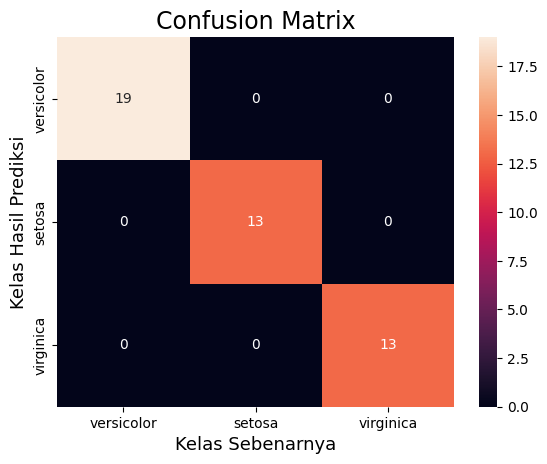

In [ ]:
#Menampilkan visualisasi confision matrix
sns.heatmap(cm, annot=True, fmt='g', xticklabels = nama_kelas, yticklabels = nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [1]:
#Menghitung metrik evaluasi untuk klasifikasi data iris
print(classification_report(y_test, kelas_prediksi))

NameError: name 'classification_report' is not defined